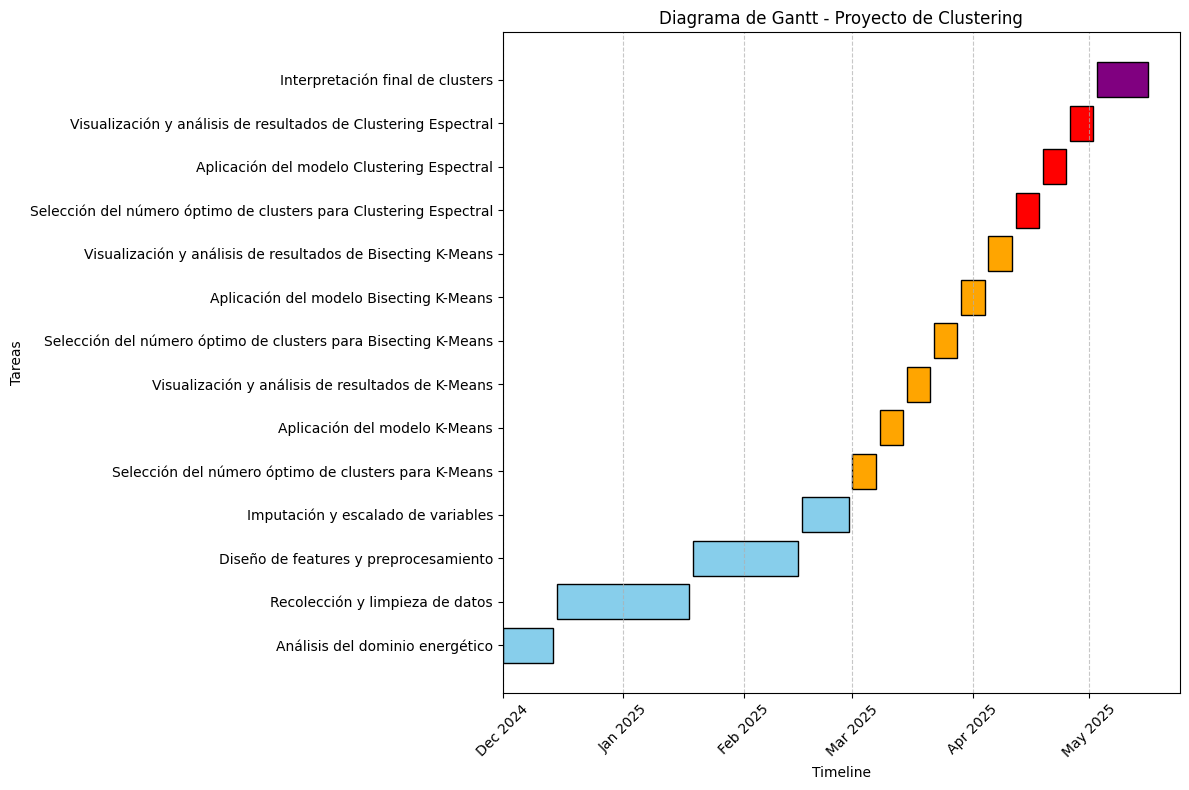

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# Datos
tasks = [
    {"Tarea": "Análisis del dominio energético", "Inicio": "2024-12-01", "Fin": "2024-12-14", "Duración": 2},
    {"Tarea": "Recolección y limpieza de datos", "Inicio": "2024-12-15", "Fin": "2025-01-18", "Duración": 5},
    {"Tarea": "Diseño de features y preprocesamiento", "Inicio": "2025-01-19", "Fin": "2025-02-15", "Duración": 4},
    {"Tarea": "Imputación y escalado de variables", "Inicio": "2025-02-16", "Fin": "2025-02-28", "Duración": 2},
    {"Tarea": "Selección del número óptimo de clusters para K-Means", "Inicio": "2025-03-01", "Fin": "2025-03-07", "Duración": 1},
    {"Tarea": "Aplicación del modelo K-Means", "Inicio": "2025-03-08", "Fin": "2025-03-14", "Duración": 1},
    {"Tarea": "Visualización y análisis de resultados de K-Means", "Inicio": "2025-03-15", "Fin": "2025-03-21", "Duración": 1},
    {"Tarea": "Selección del número óptimo de clusters para Bisecting K-Means", "Inicio": "2025-03-22", "Fin": "2025-03-28", "Duración": 1},
    {"Tarea": "Aplicación del modelo Bisecting K-Means", "Inicio": "2025-03-29", "Fin": "2025-04-04", "Duración": 1},
    {"Tarea": "Visualización y análisis de resultados de Bisecting K-Means", "Inicio": "2025-04-05", "Fin": "2025-04-11", "Duración": 1},
    {"Tarea": "Selección del número óptimo de clusters para Clustering Espectral", "Inicio": "2025-04-12", "Fin": "2025-04-18", "Duración": 1},
    {"Tarea": "Aplicación del modelo Clustering Espectral", "Inicio": "2025-04-19", "Fin": "2025-04-25", "Duración": 1},
    {"Tarea": "Visualización y análisis de resultados de Clustering Espectral", "Inicio": "2025-04-26", "Fin": "2025-05-02", "Duración": 1},
    {"Tarea": "Interpretación final de clusters", "Inicio": "2025-05-03", "Fin": "2025-05-16", "Duración": 2}
]

df = pd.DataFrame(tasks)

# Convertir fechas
df['Inicio'] = pd.to_datetime(df['Inicio'])
df['Fin'] = pd.to_datetime(df['Fin'])

# Crear figura
fig, ax = plt.subplots(figsize=(12, 8))

# Colores por categoría
colors = {
    "Preprocesamiento": "skyblue",
    "K-Means": "orange",
    "Bisecting K-Means": "green",
    "Clustering Espectral": "red",
    "Interpretación": "purple"
}

# Asignar colores
df['Color'] = df['Tarea'].apply(
    lambda x: colors["Preprocesamiento"] if "Análisis" in x or "Recolección" in x or "Diseño" in x or "Imputación" in x
    else colors["K-Means"] if "K-Means" in x
    else colors["Bisecting K-Means"] if "Bisecting" in x
    else colors["Clustering Espectral"] if "Espectral" in x
    else colors["Interpretación"]
)

# Dibujar barras
for i, task in enumerate(df.itertuples()):
    ax.barh(task.Tarea, (task.Fin - task.Inicio).days, left=task.Inicio, color=task.Color, edgecolor='black')

# Formatear fechas
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Ajustes visuales
plt.xlabel("Timeline")
plt.ylabel("Tareas")
plt.title("Diagrama de Gantt - Proyecto de Clustering")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()